**Dosyadan Okuma/yazma**

Dosyayı Google Drive'a yükleme adımları:

1.   Google Drive'a gidin (https://drive.google.com) ve oturum açın.
2.   "New" (Yeni) düğmesine tıklayın ve "File upload" (Dosya yükle) seçeneğini seçin.
"ornek_dosya.txt" dosyasını seçin ve yükleyin.

Dosya şimdi Google Drive'ınıza yüklenmiş olmalı. Şimdi Colab ortamında bu dosyayı okumak için aşağıdaki kodu kullanabilirsiniz:

In [ ]:
from google.colab import drive

# Google Drive'ı bağlama
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Dosya yolunu belirtme
#ilgili dosya dataset klasörü altında mevcut
dosya_yolu = '/content/drive/MyDrive/StudentList_colab.txt'

# Dosyayı okuma
with open(dosya_yolu, 'r') as xxx:
    for satir in xxx:
        print(satir.strip('').split(','))

['101', 'Ali Veli', '85\n']
['102', 'Ayşe Fatma', '55\n']
['103', 'Ahmet Mehmet', '75\n']
['104', 'Zeynep Derya', '10\n']
['105', 'Fatih Selim', '65\n']
['106', 'Mehmet Ali', '18\n']
['107', 'Nur Ayşe', '78\n']
['108', 'Aliye Zeynep', '13\n']
['109', 'Hasan Hüseyin', '70\n']
['110', 'Emre Can', '22\n']
['111', 'Ahmet Kamil', '96\n']
['112', 'Gizem Nur', '72\n']
['113', 'Deniz Burak', '14']


In [ ]:
#PS2 deki sözlük yapısına dönüştürme
# Öğrenci bilgilerini içeren boş bir sözlük oluşturalım
ogrenciler = {}

# Dosyayı açıp her bir satırı okuyarak verileri sözlüğe ekleyelim
with open(dosya_yolu, "r") as dosya:
    for satir in dosya:
        # Her satırı virgüllerle ayırarak öğrenci bilgilerini elde edelim
        numara, adSoyad, notu = satir.strip().split(",")
        # Öğrenci adını ve numarasını anahtar, öğrenci numarası ve notunu değer olarak kullanarak sözlüğe ekleyelim
        ogrenciler[adSoyad] = {"numara": int(numara), "not": int(notu)}

# Oluşturulan sözlüğü ekrana yazdıralım
print(ogrenciler)

{'Ali Veli': {'numara': 101, 'not': 85}, 'Ayşe Fatma': {'numara': 102, 'not': 55}, 'Ahmet Mehmet': {'numara': 103, 'not': 75}, 'Zeynep Derya': {'numara': 104, 'not': 10}, 'Fatih Selim': {'numara': 105, 'not': 65}, 'Mehmet Ali': {'numara': 106, 'not': 18}, 'Nur Ayşe': {'numara': 107, 'not': 78}, 'Aliye Zeynep': {'numara': 108, 'not': 13}, 'Hasan Hüseyin': {'numara': 109, 'not': 70}, 'Emre Can': {'numara': 110, 'not': 22}, 'Ahmet Kamil': {'numara': 111, 'not': 96}, 'Gizem Nur': {'numara': 112, 'not': 72}, 'Deniz Burak': {'numara': 113, 'not': 14}}


In [ ]:
#PS2 kodu
#Harf notları araligi: A:85-100  B:70-85 C:55-70 D:40-55 F:0-40 (grade_listte tutalım)
# ögrencinin notuna bakarak hangi harf notunu aldigina kara veren fonksiyon yazin.
def harf_notu(notu, grade_list):
    if notu >= grade_list[0]:
        return "A"
    elif notu >= grade_list[1]:
        return "B"
    elif notu >= grade_list[2]:
        return "C"
    elif notu >= grade_list[3]:
        return "D"
    else:
        return "F"

#yeni bir sözlük tanımlayalım
harf_notlari = {}

#harf notlarının alt sınırlarını verdik. A = 85 alt sınır
#grade_list = [85,70,55,40]

#grade_list elemanları kullanıcıdan alınabilir.
#Böylece harf not aralıklarını istediğimiz gibi değiştirebiliriz,
#kodun içini ellemeden farklı sonuçları görebiliriz.

liste = input("Harf notlarının alt sınırarını girin (elemanlar arasında boşluk bırakarak): ")
# Kullanıcının girdisini boşluklara göre ayırarak liste oluştur
grade_list_ch = liste.split()
# Liste elemanlarını tam sayıya dönüştür
grade_list = [];
for eg in grade_list_ch:
  grade_list.append(int(eg))

# Tüm öğrencilerin notlarını kontrol et
for ogrenci in ogrenciler.values():
    # Her öğrencinin notunu al
    ogrenci_notu = ogrenci["not"]

    # Notu harf notuna dönüştür
    harf = harf_notu(ogrenci_notu,grade_list)

    # Eğer harf, harf_notlari sözlüğünde varsa, öğrenci sayısını bir artır
    if harf in harf_notlari:
        harf_notlari[harf]["ogrenci_sayisi"] = harf_notlari[harf]["ogrenci_sayisi"] +1

    # Eğer harf yoksa, yeni bir girdi oluştur ve öğrenci sayısını 1 olarak ayarla
    else:
        harf_notlari[harf] = {"ogrenci_sayisi": 1}

#harf_notları = {A:3,B:4,c:2,D:3,F:1}
# Harf notlarına göre öğrenci sayılarını ve not aralıklarını ekrana yazdır
for harf, bilgiler in harf_notlari.items():
    print(f"{harf} harf notu alan toplam {bilgiler['ogrenci_sayisi']} öğrenci var. ")

Harf notlarının alt sınırarını girin (elemanlar arasında boşluk bırakarak): 80 60 40 20
A harf notu alan toplam 2 öğrenci var. 
C harf notu alan toplam 1 öğrenci var. 
B harf notu alan toplam 5 öğrenci var. 
F harf notu alan toplam 4 öğrenci var. 
D harf notu alan toplam 1 öğrenci var. 


In [ ]:
# Harf notlarını dosyaya yaz
with open("/content/drive/MyDrive/harf_notlari.txt", "w") as dosya:
    # Harf notlarını ve öğrenci sayılarını dosyaya yaz
    for harf, bilgiler in harf_notlari.items():
        dosya.write(f"{harf} harf notu alan toplam {bilgiler['ogrenci_sayisi']} öğrenci var.\n")

In [ ]:
#dosyaya yazılmış mı kontrol edelim

# Dosyayı oku ve içeriğini ekrana yazdır
with open("/content/drive/MyDrive/harf_notlari.txt", "r") as dosya:
    for satir in dosya:
        print(satir.strip())

A harf notu alan toplam 2 öğrenci var.
C harf notu alan toplam 1 öğrenci var.
B harf notu alan toplam 5 öğrenci var.
F harf notu alan toplam 4 öğrenci var.
D harf notu alan toplam 1 öğrenci var.


In [ ]:
#bu dosya nerede ?

import os

# Dosyanın bulunduğu dizini belirt
dosya_yolu = "/content/drive/MyDrive/harf_notlari.txt"

# Dosyanın bulunduğu dizini ekrana yazdır
print("Dosyanın bulunduğu dizin:", os.getcwd())

Dosyanın bulunduğu dizin: /content


## NumPy (Numerical Python) Giriş

NumPy, diziler, çok boyutlu diziler ve matrislerle çalışma imkanı sağlayan bir Python kütüphanesidir. Doğrusal cebir, fourier dönüşümü ve matrisler alanında çalışmak için de gerekli özelleşmiş işlevlere sahiptir. Açık kaynaklı bir projedir ve 2005 yılında Travis Oliphant tarafından oluşturulmuştur.

https://github.com/numpy/numpy

**Neden NumPy?**

*   Python'da dizilerin amacına hizmet eden listelerimiz var, ancak NumPy, geleneksel Python listelerinden 50 kata kadar daha hızlı bir dizi nesnesi sağlamayı amaçlamaktadır.
*   NumPy'deki dizi nesnesi ndarray olarak adlandırılır, ndarray ile çalışmayı çok kolaylaştıran birçok destekleyici işlev sağlar.
*   Diziler, hız ve kaynakların çok önemli olduğu veri biliminde çok sık kullanılır.

**NumPy Neden Listelerden Daha Hızlı?**
NumPy bir Python kütüphanesidir ve kısmen Python’da yazılmıştır, ancak hızlı hesaplama gerektiren parçaların çoğu C veya C ++ ile yazılmıştır.



## Kütüphane Kurulumları
Colab üzerinde aşağıdaki komutu kod hücresine yazarak varsayılan olarak yüklenmemiş kütüphaneleri yükleyebiliriz:

```
! pip install [kütüphane_ismi]
```

https://docs.python.org/tr/3/installing/index.html

In [ ]:
!pip install NumPy

In [ ]:
#NumPy kurulduktan sonra, import anahtar sözcüğünü ekleyerek uygulamalarınıza aktarın.
#NumPy genellikle np takma adı (alias) altında içe aktarılır.
#Artık NumPy paketinden numpy yerine np olarak bahsedilebilir.
import numpy as np

In [ ]:
b = np.array([1, 2, 3, 4, 5,6,7])
print(b)

print(b[1:3]) # 1. ve 3. elemanların arasındakiler

print(b[::3]) # x=3 eleman aralıkla

[1 2 3 4 5 6 7]
[2 3]
[1 4 7]


In [ ]:
#kac boyut(dimension) var
c = np.array([[1, 2, 3,4,5,6],
             [4, 5, 6,0,0,0]])
print(c)

print(b.ndim)  # 1
print(c.ndim)  # 2

[[1 2 3 4 5 6]
 [4 5 6 0 0 0]]
1
2


In [ ]:
arr = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
print(arr.shape)  # (2, 4)  #(shape), her boyuttaki öğelerin sayısıdır.


(2, 4)


In [ ]:
#Aşağıdaki 1-D diziyi 12 elemanlı bir 3-D dizisine dönüştürelim.
#En dıştaki boyut, her biri 2 eleman içeren 3 dizi içeren 2 diaalt diziye sahip olacaktır:

arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
newarr = arr.reshape(2, 3, 2)
print(newarr.ndim)
print(newarr)

wrongshape = arr.reshape(3,3)  #her boyutta 4 öğeli bir 2D diziye dönüşüm
print(wrongshape)

3
[[[ 1  2]
  [ 3  4]
  [ 5  6]]

 [[ 7  8]
  [ 9 10]
  [11 12]]]
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [ ]:
#dizileri birleştirme
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])
arr = np.concatenate((arr1, arr2))
print(arr)

[1 2 3 4 5 6]


In [ ]:
arr3 = np.array([[1, 2], [3, 4]])
arr4 = np.array([[5, 6], [7, 8]])
print(arr3)
print(arr4)

arr5 = np.concatenate((arr3, arr4), axis=1)  #dizileri yatay olarak birleştirir.
print(arr5)

arr6 = np.concatenate((arr3, arr4), axis=0) #dizileri dikey olarak birleştirir. Yani, dizilerin satırları üst üste gelir.
print(arr6)

[[1 2]
 [3 4]]
[[5 6]
 [7 8]]
[[1 2 5 6]
 [3 4 7 8]]
[[1 2]
 [3 4]
 [5 6]
 [7 8]]


**Draw Line plot**

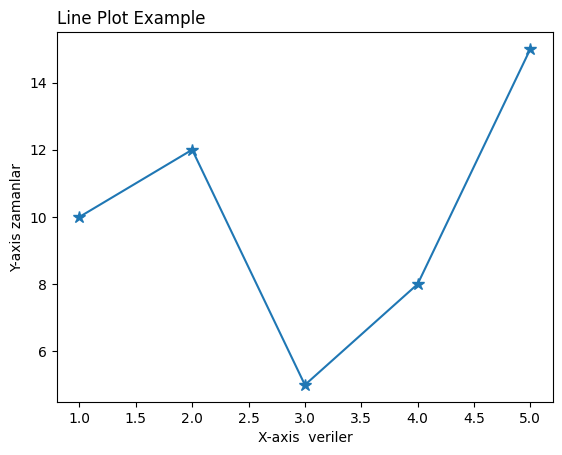

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x_values = [1, 2, 3, 4, 5]
y_values = [10, 12, 5, 8, 15]

# The marker='o' parameter adds circular markers at each data point, and linestyle='-' connects the points with a line.
markers = ['>', '*', '+', 'x', 'o', 'v']
# Create a line plot
plt.plot(x_values, y_values, marker=markers[1], linestyle='-',markersize = 9)

# Add labels and title
plt.xlabel('X-axis  veriler')
plt.ylabel('Y-axis zamanlar')
plt.title('Line Plot Example', loc='left')


#If you want to save the bar plot as png, eps, jpeg file, format option can be changed
plt.savefig('lineplot.eps', format='eps', bbox_inches='tight')


**Draw Bar Plot**

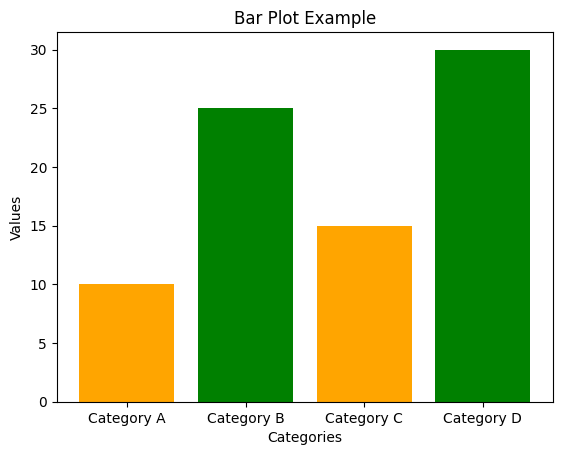

In [ ]:
#Make sure to install Matplotlib before running the code: pip install matplotlib

#import matplotlib.pyplot as plt

# Sample data
categories = ['Category A', 'Category B', 'Category C', 'Category D']
values = [10, 25, 15, 30]

#Color options which you can select
colors = ['blue', 'orange', 'green', 'red']
# Create a bar plot
#plt.bar(categories, values, color=colors[:])# tüm renkleri kullan
plt.bar(categories, values, color=colors[1:3])

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Plot Example')


#If you want to save the bar plot as png, eps, jpeg file, format option can be changed
plt.savefig('barplot.eps', format='eps', bbox_inches='tight')



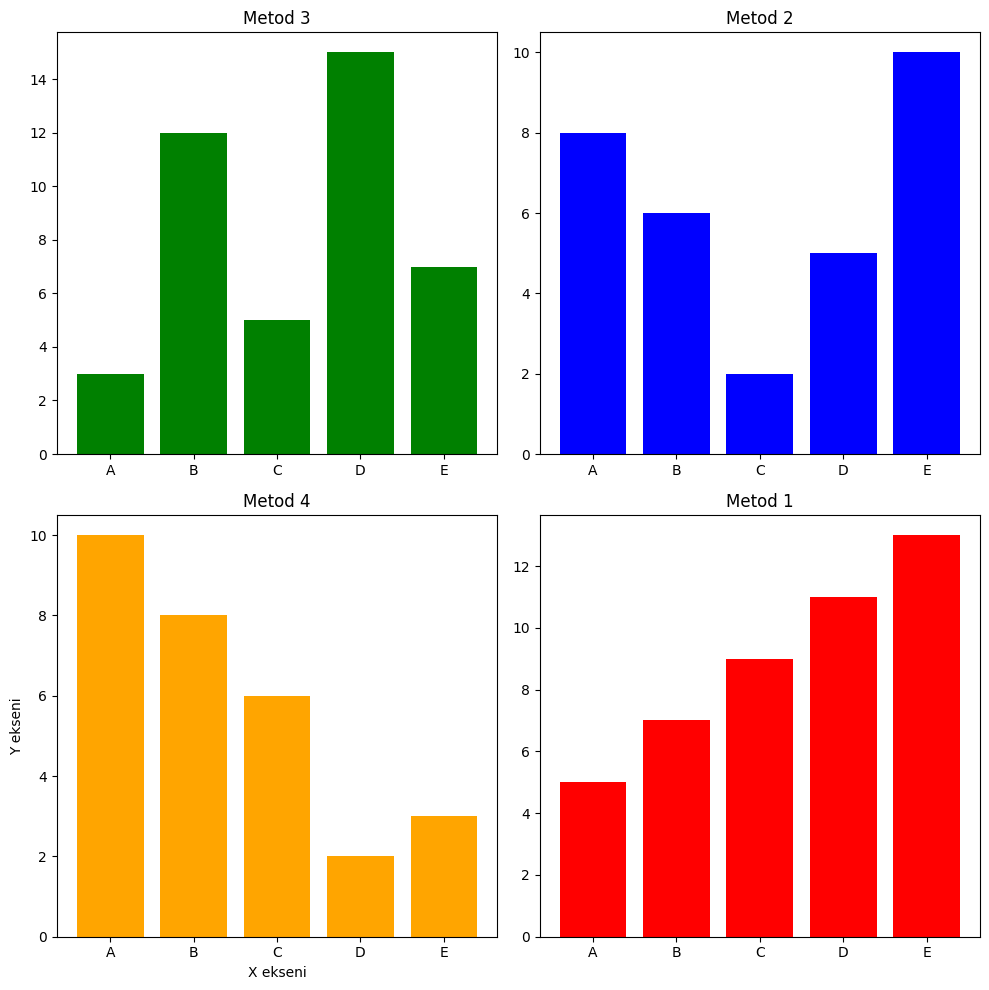

In [ ]:
import matplotlib.pyplot as plt

# Veri örnekleri
veri1 = [5, 7, 9, 11, 13]
veri2 = [8, 6, 2, 5, 10]
veri3 = [3, 12, 5, 15, 7]
veri4 = [10, 8, 6, 2, 3]
etiketler = ['A', 'B', 'C', 'D', 'E']

# 4 subplot oluştur
plt.figure(figsize=(5, 5))

# Birinci subplot (üst sıra, sol)
plt.subplot(2, 2, 4)
plt.bar(etiketler, veri1, color='red')
plt.title('Metod 1')

# İkinci subplot (üst sıra, sağ)
plt.subplot(2, 2, 2)
plt.bar(etiketler, veri2, color='blue')
plt.title('Metod 2')

# Üçüncü subplot (alt sıra, sol)
plt.subplot(2, 2, 1)
plt.bar(etiketler, veri3, color='green')
plt.title('Metod 3')

# Dördüncü subplot (alt sıra, sağ)
plt.subplot(2, 2, 3)
plt.bar(etiketler, veri4, color='orange')
plt.title('Metod 4')
plt.xlabel('X ekseni')
plt.ylabel('Y ekseni')

# Grafikleri göster
plt.tight_layout()

